In [2]:
import sys
sys.path.append('../')

import os

import cqt
import cqt.env.mkt_env as env 
import cqt.env.mkt_env_spot as envspot
import cqt.ledger.ledger as ledger
import cqt.datagen as dg
import cqt.dbutility.dbutility as db
import cqt.strats.strategy as stg
import cqt.strats.strategy_long_short_average as stg_ls
import pandas as pd
import pickle

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.collections as collections
from talib.abstract import *
import copy

In [3]:
data = pd.read_csv('../data/webdata/Gemini_BTCUSD_d_20200126.csv',skiprows=1)
data.rename(columns={'Open': 'price_open', 'High': 'price_high', 'Low': 'price_low', 'Close': 'price_close', 'Volume BTC':'volume_traded','Date':'time_close'},inplace=True)
df_btc=dg.IndexedData("","",data)

config = {'asset_type': 'spot'}
model_btc = env.MktEnv([])
comp_btc = envspot.MktEnvSpot('btc', df_btc, config)
comp_btc.data=comp_btc.data.sort_index()
model_btc.insert_section(comp_btc)


In [4]:
prices = copy.deepcopy(comp_btc.data)
prices.rename(columns={'price_open': 'open', 'price_high': 'high', 'price_low': 'low', 'price_close': 'close', 'volume_traded': 'volume'}, inplace=True)
close = pd.Series(prices['close'].values)
sma15 = SMA(prices, timeperiod=15)
sma60 = SMA(prices, timeperiod=60)
rsi = RSI(prices, timeperiod=14)
atr = ATR(prices, timeperiod=7)

In [1]:
prices.loc[datetime(2020,1,1):datetime(2020,1,10),['1day_l','7day_l','15day_l','30day_l']]

NameError: name 'prices' is not defined

In [5]:
import numpy as np

b=prices.close.diff(1).values[1:]


b=np.append(b,0)

prices['1day_l']=b/prices['close']


b=prices.close.diff(7).values[7:]

b=np.append(b,[0]*7)

prices['7day_l']=b/prices['close']
#len(prices.close)

prices.drop(['range_open','range_close','range_high','range_low','period_abs_return','period_log_return'], axis=1, inplace=True)

In [6]:
b=prices.close.diff(15).values[15:]
b=np.append(b,[0]*15)
prices['15day_l']=b/prices['close']

In [7]:
b=prices.close.diff(30).values[30:]
b=np.append(b,[0]*30)
prices['30day_l']=b/prices['close']

In [9]:
data=prices.loc[datetime(2019,1,1):datetime(2020,1,1),['1day_l','7day_l','15day_l','30day_l']]

In [72]:
Covariance = np.cov(np.stack(data.values, axis = 1))
print(Covariance)

[[0.0013671  0.00131234 0.00138332 0.00125707]
 [0.00131234 0.00959104 0.00991579 0.00861886]
 [0.00138332 0.00991579 0.02259851 0.02167018]
 [0.00125707 0.00861886 0.02167018 0.04539905]]


In [74]:
from scipy import stats
stats.pearsonr(data['1day_l'].values, data['7day_l'].values)

(0.3624206649442246, 8.399010358440522e-13)

In [76]:
stats.pearsonr(data['1day_l'].values, data['15day_l'].values)

(0.24887532236720142, 1.4280903461631176e-06)

In [75]:
stats.pearsonr(data['1day_l'].values, data['30day_l'].values)

(0.15956426195754012, 0.0021997924838698304)

In [77]:
stats.pearsonr(data['7day_l'].values, data['15day_l'].values)

(0.6735259886956946, 1.0300895626239192e-49)

In [78]:
stats.pearsonr(data['7day_l'].values, data['30day_l'].values)

(0.4130415613165217, 1.6377357351116503e-16)

In [79]:
stats.pearsonr(data['15day_l'].values, data['30day_l'].values)

(0.6765488883357548, 2.620134441588468e-50)

In [83]:
print(data.describe())

           1day_l      7day_l     15day_l     30day_l
count  366.000000  366.000000  366.000000  366.000000
mean     0.002306    0.017333    0.041085    0.086990
std      0.036974    0.097934    0.150328    0.213071
min     -0.138578   -0.249902   -0.222765   -0.249737
25%     -0.013813   -0.037233   -0.053240   -0.049326
50%      0.000922    0.000482    0.018831    0.056406
75%      0.017462    0.059199    0.109619    0.205965
max      0.185363    0.393616    0.633260    0.702211


In [1]:
#pd.options.display.mpl_style = 'default'
data.boxplot()

NameError: name 'data' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9c797ce48>,
      dtype=object)

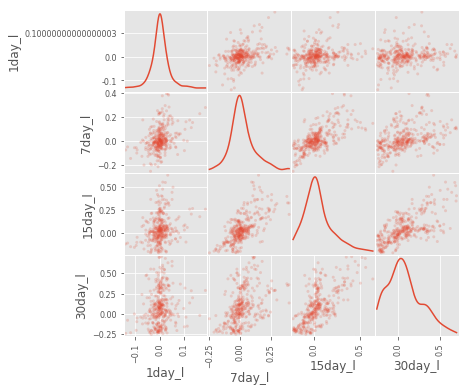

In [87]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:
from sklearn import svm

In [92]:
X=technical_index.loc[datetime(2019,1,1):datetime(2020,1,1),:]
X.tail()

,MA5,MA10,MA20,MA60,MA120,ADX,ADXR,MACD,RSI,BBANDS_U,BBANDS_M,BBANDS_L,AD,ATR,HT_DC,High/Open,Low/Open,Close/Open
time_close,,,,,,,,,,,,,,,,,,
2019-12-28,666.526,701.545,814.4150,7854.365667,8468.888583,18.558881,22.632642,-77.668102,49.383116,7319.800295,7238.308,7156.815705,832570.764862,291.470479,18.713840,1.014856,0.999619,1.008153
2019-12-29,613.770,638.540,780.0280,7824.689167,8450.438500,18.655243,23.169539,-59.519811,51.831166,7412.762162,7264.242,7115.721838,832549.136281,288.188302,18.243481,1.030301,0.996672,1.012289
2019-12-30,708.150,647.355,784.9925,7792.393667,8429.131417,18.382828,23.789964,-58.515083,47.072243,7409.345458,7268.976,7128.606542,831961.216518,281.206995,17.764061,1.000000,0.974230,0.976436
2019-12-31,730.718,704.085,790.5870,7757.710667,8402.244917,17.734969,22.929610,-61.079184,45.763454,7417.196730,7262.990,7108.783270,831582.637050,274.333638,17.373244,1.011603,0.985969,0.993020
2020-01-01,613.584,721.099,785.7025,7722.171000,8373.494917,17.133385,22.130711,-61.650156,46.061647,7419.623568,7249.698,7079.772432,831328.322835,260.813378,17.105081,1.009175,0.997307,1.001298


In [95]:
y=data['7day_l']

In [96]:
from sklearn import svm
clf = svm.SVR()
clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

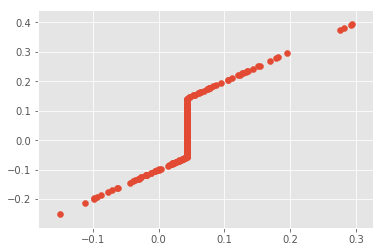

In [120]:
plt.scatter(clf.predict(X),data['7day_l'])

In [105]:
data['target7']=data.apply(lambda row:1 if row['7day_l']>0 else -1 ,axis=1)

(array([  2.,   8.,  13.,  22., 292.,  11.,  10.,   4.,   0.,   4.]),
 array([-0.14994162, -0.10560211, -0.06126259, -0.01692308,  0.02741643,
         0.07175595,  0.11609546,  0.16043497,  0.20477449,  0.249114  ,
         0.29345351]),
 <a list of 10 Patch objects>)

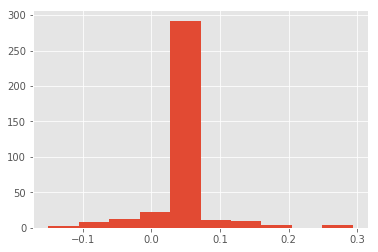

In [123]:
plt.hist(clf.predict(X))

In [124]:
prediction=pd.DataFrame({'svm': clf.predict(X), 'ridge': ridge_model.predict(X)})

In [107]:
svc = svm.SVC(kernel='sigmoid')
svc.fit(X, data['target7'])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9bb7a8b38>,
      dtype=object)

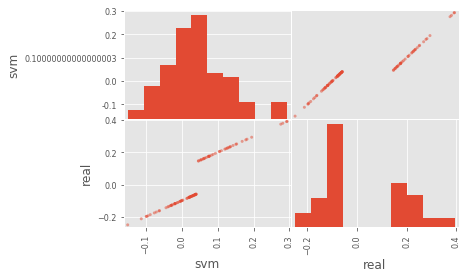

In [140]:
scatter_matrix(prediction[abs(prediction.svm-0.043304)>1e-6][['svm','real']])

In [109]:
y_pred=svc.predict(X)
y_real=data['target7'].values

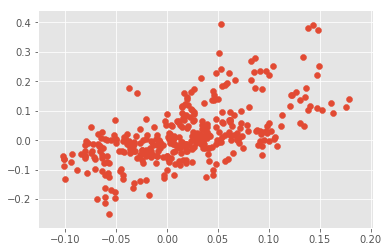

In [119]:
plt.scatter(ridge_model.predict(X),data['7day_l'])

In [99]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10)
ridge_model.fit(X, y)
ridge_model.score(X,y)

0.36489078451016177

In [8]:
import talib as tb
def technical_indicators_df(daily_data):
        """
        Assemble a dataframe of technical indicator series for a single stock
        """
        o = daily_data['open'].values
        c = daily_data['close'].values
        h = daily_data['high'].values
        l = daily_data['low'].values
        v = daily_data['volume'].astype(float).values
        # define the technical analysis matrix

        # Most data series are normalized by their series' mean
        ta = pd.DataFrame()
        ta['MA5'] = tb.MA(c, timeperiod=5) 
        ta['MA10'] = tb.MA(c, timeperiod=10)
        ta['MA20'] = tb.MA(c, timeperiod=20) 
        ta['MA60'] = tb.MA(c, timeperiod=60) 
        #ta['MA120'] = tb.MA(c, timeperiod=120) 
        ta['MA5'] = tb.MA(v, timeperiod=5) 
        ta['MA10'] = tb.MA(v, timeperiod=10)
        ta['MA20'] = tb.MA(v, timeperiod=20) 
        ta['ADX'] = tb.ADX(h, l, c, timeperiod=14) 
        ta['ADXR'] = tb.ADXR(h, l, c, timeperiod=14) 
        ta['MACD'] = tb.MACD(c, fastperiod=12, slowperiod=26, signalperiod=9)[0] 
        ta['RSI'] = tb.RSI(c, timeperiod=14) 
        ta['BBANDS_U'] = tb.BBANDS(c, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[0] 
        ta['BBANDS_M'] = tb.BBANDS(c, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[1] 
        ta['BBANDS_L'] = tb.BBANDS(c, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)[2] 
        ta['AD'] = tb.AD(h, l, c, v) 
        ta['ATR'] = tb.ATR(h, l, c, timeperiod=14) 
        ta['HT_DC'] = tb.HT_DCPERIOD(c) 
        ta["High/Open"] = h / o
        ta["Low/Open"] = l / o
        ta["Close/Open"] = c / o
        ta.index=daily_data.index
        return ta

In [34]:
#data['target']=data.apply(lambda row:1 if row['1day_pl']>0 else -1 ,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
technical_index=technical_indicators_df(prices)

technical_index.index=prices.index

In [61]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.001)

In [64]:
start=816
end=1117
technical_index[start:end].values

array([[7.77575600e+03, 7.90575500e+03, 1.04904280e+04, ...,
        1.00028726e+00, 9.26176497e-01, 9.65134520e-01],
       [7.34011200e+03, 8.01678800e+03, 1.03512050e+04, ...,
        1.14331243e+00, 9.63458163e-01, 1.10508599e+00],
       [7.77205200e+03, 7.80575800e+03, 1.03436290e+04, ...,
        1.04476974e+00, 9.89374556e-01, 1.02773592e+00],
       ...,
       [3.15711800e+03, 2.69162200e+03, 2.75674550e+03, ...,
        1.00943706e+00, 9.97699423e-01, 1.00178256e+00],
       [2.69259800e+03, 2.53032800e+03, 2.75664700e+03, ...,
        1.00373530e+00, 9.97964409e-01, 1.00139351e+00],
       [2.03969600e+03, 2.11931300e+03, 2.66836450e+03, ...,
        1.00139781e+00, 9.96510146e-01, 9.99187209e-01]])

In [65]:
ridge_model.fit(technical_index[start:end].values,data['target'][start:end].values)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [68]:
X_test=technical_index[end:end+10].values
Y_test=data['target'][end:end+10].values
ridge_model.score(X_test,Y_test)

-0.6506522837406914

In [ ]:
lin_est = LinearRegression() # Create an instance of the LinearRegression class
lin_est.fit(X,y) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

In [28]:
start=datetime(2018,1,1)
end=datetime(2019,1,1)
X=technical_index.loc[start:end,:]
y=prices.loc[start:end,['7day_l']].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn import svm
clf = svm.SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
#plt.scatter(clf.predict(X),y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
from sklearn import metrics
#y_pred = clf.predict(X_test)
print("Accuracy:",clf.score(X_test,y_test))

Accuracy: -0.00793177876822937


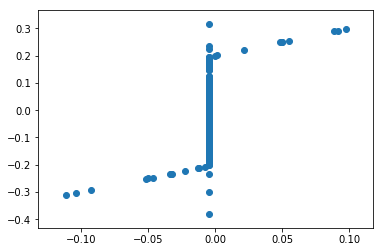

In [33]:
plt.scatter(clf.predict(X),y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


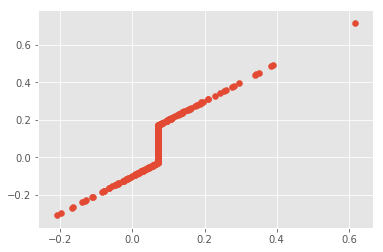

In [142]:
start=datetime(2017,1,1)
end=datetime(2018,1,1)
X=technical_index.loc[start:end,:]
y=prices.loc[start:end,['7day_l']].values
clf = svm.SVR()
clf.fit(X, y)
plt.scatter(clf.predict(X),y)

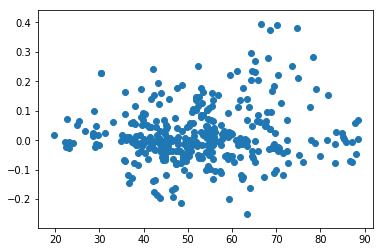

In [34]:
start=datetime(2019,1,1)
end=datetime(2019,12,31)
X=technical_index.loc[start:end,['RSI']].values
y=prices.loc[start:end,['7day_l']].values
plt.scatter(X,y)

In [74]:
import joblib
from sklearn import svm
def modeltraining(start,end,X,y,file_name,signal):
    #X=technical_index.loc[start:end,:]
    #X.drop(['MA120'], axis=1, inplace=True)
    #y=prices.loc[start:end,['7day_l']].values
    clf = svm.SVR()
    clf.fit(X, y)
    joblib.dump(clf, file_name)
    plt.scatter(clf.predict(X),y)
    plt.xlabel('prediction')
    plt.ylabel('real value')
    plt.savefig('./results/'+signal+str(start.year)+'_svm_training.png')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


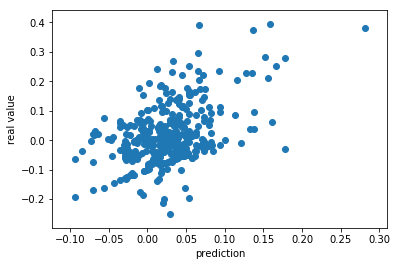

In [36]:
start=datetime(2019,1,1)
end=datetime(2019,12,31)
output='./model/svm_RSI'+str(start.year)+'.joblib'
modeltraining(start,end,X,y,output)

In [42]:
model = joblib.load(output) 
report=back_testing(start,end,prices,technical_index[['RSI']],model,-0.02,0.02)

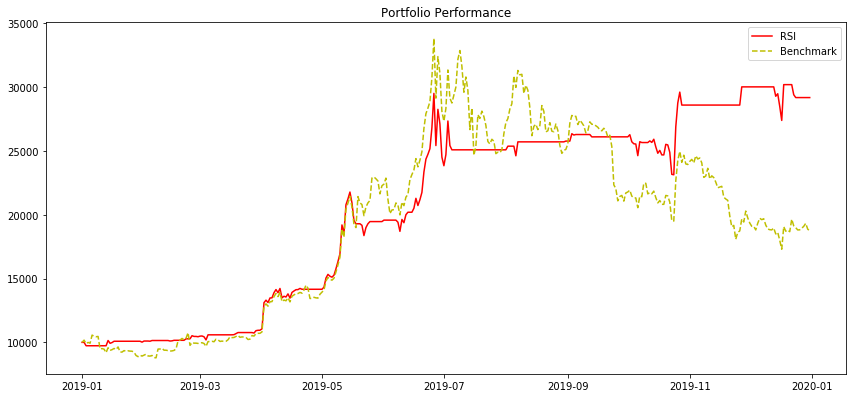

In [43]:
plot_performance(report,'RSI')

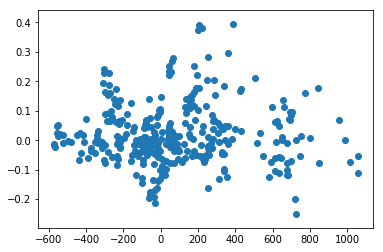

In [80]:
start=datetime(2019,1,1)
end=datetime(2019,12,31)
signal='MACD'
X=technical_index.loc[start:end,[signal]].values
y=prices.loc[start:end,['7day_l']].values
plt.scatter(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


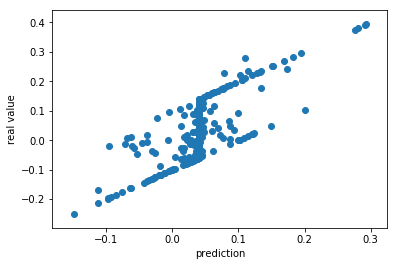

In [81]:
output='./model/svm_'+signal+'_'+str(start.year)+'.joblib'
modeltraining(start,end,X,y,output,signal)

In [47]:
model = joblib.load(output) 
report=back_testing(start,end,prices,technical_index[[signal]],model,-0.02,0.02)

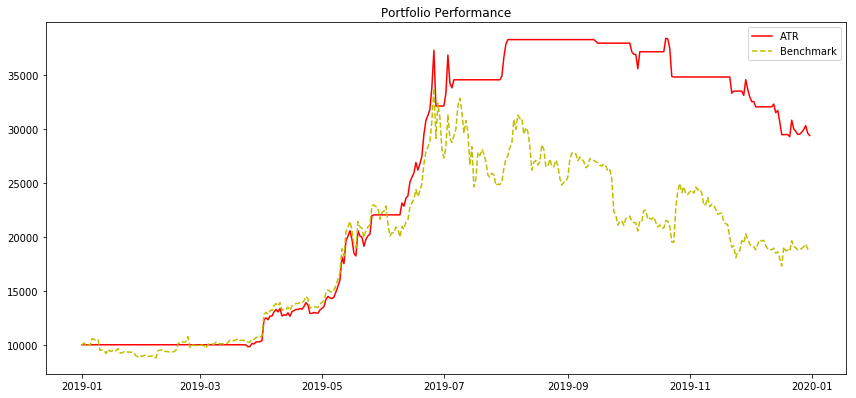

In [48]:
plot_performance(report,signal)

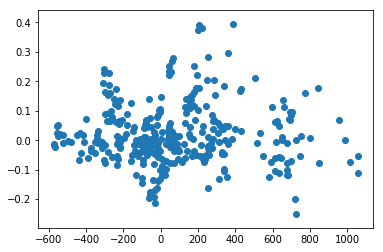

In [92]:
start=datetime(2019,1,1)
end=datetime(2019,12,31)
signal='MACD'
X=technical_index.loc[start:end,[signal]].values
y=prices.loc[start:end,['7day_l']].values
plt.scatter(X,y)

In [94]:
output='./model/svm_'+signal+'_'+str(start.year)+'.joblib'
#modeltraining(start,end,X,y,output)

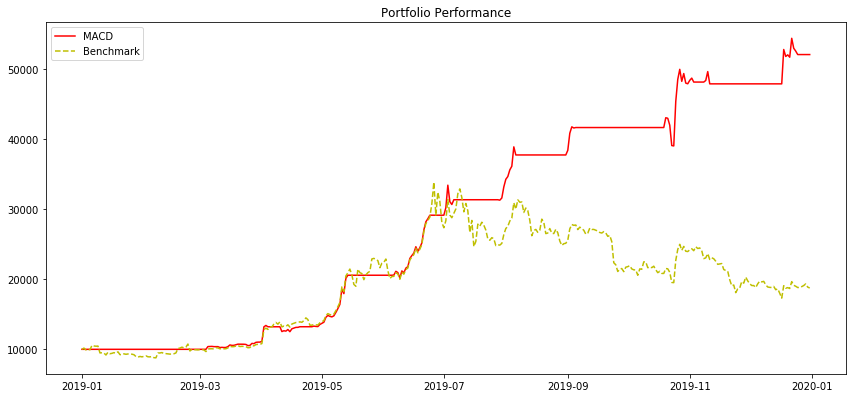

In [95]:
model = joblib.load(output) 
report_1=back_testing(start,end,prices,technical_index[[signal]],model,-0.01,0.01)
plot_performance(report,signal)

In [88]:
start=datetime(2019,1,1)
end=datetime(2019,12,31)
signals=['BBANDS_U','BBANDS_M','BBANDS_L']
X=technical_index.loc[start:end,signals].values
y=prices.loc[start:end,['7day_l']].values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c77e3e3c8>,
      dtype=object)

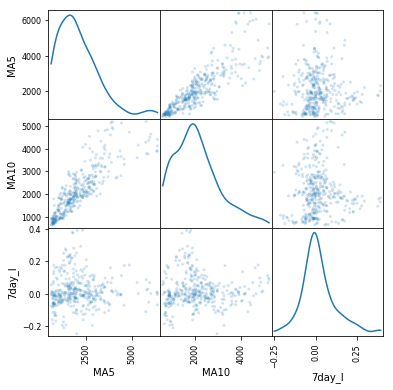

In [86]:
from pandas.plotting import scatter_matrix
scatter_matrix(pd.merge(technical_index.loc[start:end,signals], prices.loc[start:end,['7day_l']],left_index=True,right_index=True), alpha=0.2, figsize=(6, 6), diagonal='kde')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


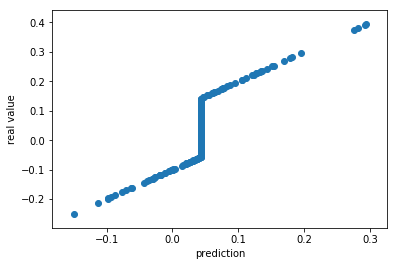

In [89]:
output='./model/svm_'+'_'.join(signals)+'_'+str(start.year)+'.joblib'
modeltraining(start,end,X,y,output,'_'.join(signals))

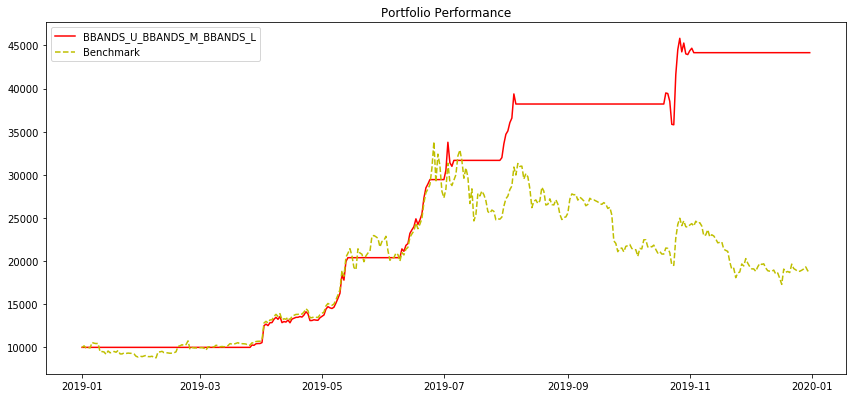

In [91]:
model = joblib.load(output) 
report=back_testing(start,end,prices,technical_index[signals],model,-0.01,0.01)
plot_performance(report,'_'.join(signals))

In [102]:
signal='RSI'
output='./model/svm_'+signal+'_'+str(start.year)+'.joblib'
#modeltraining(start,end,X,y,output)
model = joblib.load(output) 
report_RSI=back_testing(start,end,prices,technical_index[[signal]],model,-0.01,0.01)
#plot_performance(report,'_'.join(signals))

In [101]:
signal=['BBANDS_U','BBANDS_M','BBANDS_L']
output='./model/svm_'+'_'.join(signal)+'_'+str(start.year)+'.joblib'
#modeltraining(start,end,X,y,output)
model = joblib.load(output) 
report_BBAND=back_testing(start,end,prices,technical_index[signal],model,-0.01,0.01)

In [ ]:
start=datetime(2019,1,1)
end=datetime(2019,12,31)
signal=['BBANDS_U','BBANDS_M','BBANDS_L']
X=technical_index.loc[start:end,signal].values
y=prices.loc[start:end,['7day_l']].values
scatter_matrix(pd.merge(technical_index.loc[start:end,signal], prices.loc[start:end,['7day_l']],left_index=True,right_index=True), alpha=0.2, figsize=(6, 6), diagonal='kde')

output='./model/svm_'+'_'.join(signal)+'_'+str(start.year)+'.joblib'
modeltraining(start,end,X,y,output)

model = joblib.load(output) 
report=back_testing(start,end,prices,technical_index[signal],model,-0.02,0.02)
plot_performance(report,'_'.join(signal))

In [39]:
def back_testing(start,end,prices,technical_index,model,lb,up):    
    report_col = ['date','total', 'pnl', 'cash', 'btc_price','btc_holding','predict','action']
    report = pd.DataFrame(columns=report_col)
    X=technical_index.loc[start:end,:]
    #X.drop('MA120', axis=1, inplace=True)
    y=prices.loc[start:end,['7day_l']].values
    y_pred=model.predict(X)
    thread=np.median(y_pred)
    report['date']=X.index
    report['predict']=y_pred
    report['btc_price']=prices.loc[start:end,['close']].values
    report['total']=report['btc_price']*0
    report['pnl']=report['btc_price']*0
    report['cash']=report['btc_price']*0
    report['btc_holding']=report['btc_price']*0
    report.at[0,'cash']=10000
    report.at[0,'total']=10000
    report['action']=report.apply(lambda row:1 if row['predict']-thread>up else -1 if row['predict']-thread<lb else 0,axis=1)
    #report.index=X.index
    n=report.shape[0]
    for i in range(1,n):
        #print(i)
        if report.at[i,'action']==1:
            if report.at[i-1,'btc_holding']==0:
                report.at[i,'total']=report.at[i-1,'cash']
                report.at[i,'cash']=0
                report.at[i,'btc_holding']=report.at[i,'total']/report.at[i,'btc_price']
            else:
                report.at[i,'btc_holding']=report.at[i-1,'btc_holding']
                report.at[i,'cash']=0
                report.at[i,'total']=report.at[i,'btc_holding']*report.at[i,'btc_price']

        elif report.at[i,'action']==-1: 
            if report.at[i-1,'btc_holding']==0:
                report.at[i,'total']=report.at[i-1,'total']
                report.at[i,'cash']=report.at[i-1,'cash']
                report.at[i,'btc_holding']=0
            else:
                report.at[i,'total']=report.at[i-1,'total']
                report.at[i,'cash']=report.at[i,'total']
                report.at[i,'btc_holding']=0
        else:
            if report.at[i-1,'btc_holding']==0:
                report.at[i,'total']=report.at[i-1,'total']
                report.at[i,'cash']=report.at[i-1,'cash']
                report.at[i,'btc_holding']=0
            else:
                report.at[i,'btc_holding']=report.at[i-1,'btc_holding']
                report.at[i,'cash']=0
                report.at[i,'total']=report.at[i,'btc_holding']*report.at[i,'btc_price']
                
    return report        

In [25]:
def plot_performance(report,sname):
    fig_width = 12
    fig_height = 6
    fig, ax = plt.subplots(figsize=(fig_width,fig_height))
    t=report['date']
    ax.plot(t, report['total'],'r',label=sname)
    ax.plot(t, report['btc_price'] * report.at[0,'cash'] / report['btc_price'][0],'y--',label='Benchmark')
    ax.set_title('Portfolio Performance')#fig.suptitle(strategyName)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.legend()
    fig.savefig('./results/'+sname+str(report.date[0])+'_svm_performance.png')

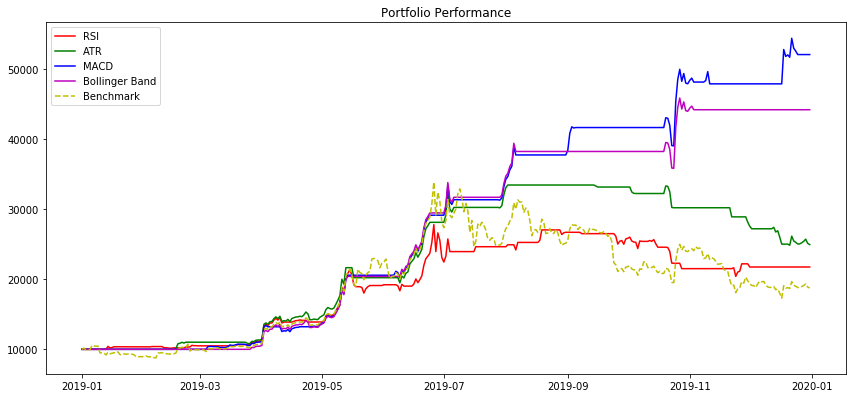

In [103]:
fig_width = 12
fig_height = 6
fig, ax = plt.subplots(figsize=(fig_width,fig_height))
t=report['date']
ax.plot(t, report_RSI['total'],'r',label='RSI')
ax.plot(t, report_ATR['total'],'g',label='ATR')
ax.plot(t, report_MACD['total'],'b',label='MACD')
ax.plot(t, report_BBAND['total'],'m',label='Bollinger Band')
ax.plot(t, report['btc_price'] * report.at[0,'cash'] / report['btc_price'][0],'y--',label='Benchmark')
ax.set_title('Portfolio Performance')#fig.suptitle(strategyName)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.legend()

In [104]:
fig.savefig('./results/'+'compare'+str(report.date[0])+'_svm_performance.png')